In [2]:
### This is supposed to be a demo for how to do inference using the model and a new line of text


In [1]:
#General Imports
import torch
import torch.nn  as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader
import random
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from tensorboardX import SummaryWriter

#Load fake, non handwritten generator 
from fake_texts.pytorch_dataset_fake import Dataset

#Import the loss from baidu 
from torch_baidu_ctc import CTCLoss

#Import the model 
from fully_conv_model import cnn_attention_ocr

#Helper to count params
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
from evaluation import wer_eval,preds_to_integer,show,my_collate,AverageMeter

In [2]:
###Set up model. 
cnn=cnn_attention_ocr(model_dim=64,nclasses=93,n_layers=8)
cnn=cnn.cuda().eval()
cnn.load_state_dict(torch.load("8_layers_continued_on_blanks.pt"))
count_parameters(cnn)

3543584

In [3]:
from PIL import Image
import numpy as np
from glob import glob

In [4]:
input_folder="/home/leander/AI/data/test_hardik/"

In [5]:
files=glob(input_folder+"*.png")

In [6]:
from skimage.color import gray2rgb
from skimage.transform import resize
import cv2


In [7]:
imglist=[]
for j in files:
    img = Image.open(j).convert('L')
    img=cv2.cvtColor(np.array(img),cv2.COLOR_GRAY2RGB)
    img=img.astype(float)
    img=img/255
    resize_shape=(32,int(32*img.shape[1]/img.shape[0]))
    img = resize(img,resize_shape,mode="constant")
    img=np.expand_dims(img,0)
    img=torch.tensor(img).cuda().float().permute((0,3,1,2))
    imglist.append(img)

In [8]:
batch_size=1
width=-1
alignment=1

ds=Dataset(batch_size,epoch_size=1,random_strings=True,num_words=5,transform=True,
           height=32,width=width,alignment=alignment)


In [9]:
np.expand_dims

<function numpy.lib.shape_base.expand_dims>

In [10]:
ds[0][0].shape

(1, 32, 116, 3)

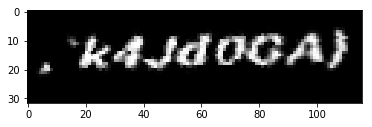

In [11]:
plt.imshow(ds[0][0][0,:,:,:])
plt.show()

In [12]:
example_image=ge[0]

NameError: name 'ge' is not defined

In [ ]:
ge[0].shape

In [13]:
#example_image=torch.tensor(imglist[1])

In [92]:
# THe image has to be same size as the example imge 
example_image.shape

torch.Size([1, 3, 24, 63])

In [93]:
#example_image=example_image[:,:,:,200:560]

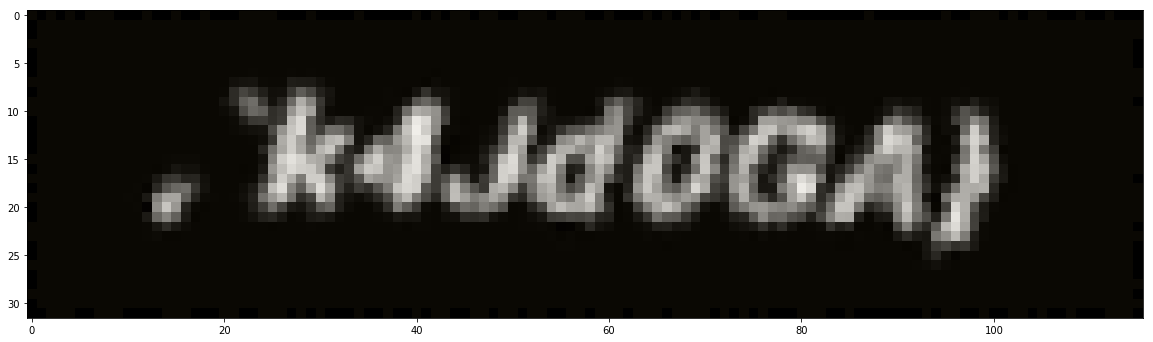

In [20]:
#Then we set up our own custom dataloade500r, with a custom collate, which packs the data
#(does the padding) Should work with variable number of widths. 
#Multiple worker leads to crash with CTC loss 

trainset = DataLoader(dataset=ds,
                      batch_size=batch_size,
                      shuffle=False,
                      collate_fn=my_collate)
gen = iter(trainset)
ge=next(gen)

example_image=ge[0]

show(example_image.detach().cpu()[0,:,:,:])
plt.show()

In [151]:
log_probs = cnn(example_image).permute((2,0,1))[:,0,:]
#preds_to_integer(log_probs)
"".join([ds.decode_dict[j] for j in preds_to_integer(log_probs)])

''

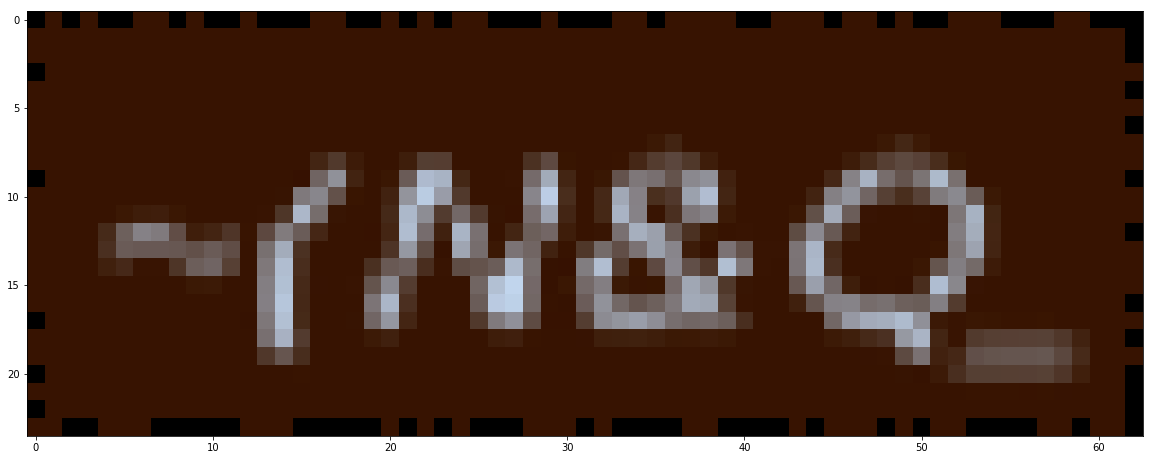

In [87]:
show(example_image.detach().cpu()[0,:,:,:])
plt.show()

In [81]:
log_probs = cnn(example_image).permute((2,0,1))[:,0,:]
#preds_to_integer(log_probs)
"".join([ds.decode_dict[j] for j in preds_to_integer(log_probs)])

'J, TN7b,q'